In [35]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import pandas as pd

df = pd.read_csv('/content/201501_201912_주민등록인구및세대현황_월간.csv', encoding='cp949')

In [2]:
df.head()

,행정구역,2015년01월_총인구수,2015년01월_세대수,2015년01월_세대당 인구,2015년01월_남자 인구수,2015년01월_여자 인구수,2015년01월_남여 비율,2015년02월_총인구수,2015년02월_세대수,2015년02월_세대당 인구,...,2019년11월_세대당 인구,2019년11월_남자 인구수,2019년11월_여자 인구수,2019년11월_남여 비율,2019년12월_총인구수,2019년12월_세대수,2019년12월_세대당 인구,2019년12월_남자 인구수,2019년12월_여자 인구수,2019년12월_남여 비율
0,전국 (1000000000),"51,342,881","20,740,958",2.48,"25,675,816","25,667,065",1.00,"51,360,454","20,772,167",2.47,...,2.31,"25,866,604","25,984,823",1.00,"51,849,861","22,481,466",2.31,"25,864,816","25,985,045",1.00
1,서울특별시 (1100000000),"10,104,515","4,196,435",2.41,"4,979,523","5,124,992",0.97,"10,105,206","4,201,451",2.41,...,2.25,"4,746,636","4,985,941",0.95,"9,729,107","4,327,605",2.25,"4,744,059","4,985,048",0.95
2,부산광역시 (2600000000),"3,517,898","1,422,500",2.47,"1,739,447","1,778,451",0.98,"3,517,939","1,424,605",2.47,...,2.28,"1,677,165","1,739,556",0.96,"3,413,841","1,497,908",2.28,"1,675,417","1,738,424",0.96
3,대구광역시 (2700000000),"2,492,658","971,407",2.57,"1,240,653","1,252,005",0.99,"2,492,583","973,010",2.56,...,2.37,"1,207,318","1,234,263",0.98,"2,438,031","1,031,251",2.36,"1,205,286","1,232,745",0.98
4,인천광역시 (2800000000),"2,904,876","1,137,515",2.55,"1,460,106","1,444,770",1.01,"2,906,603","1,138,893",2.55,...,2.39,"1,482,519","1,474,730",1.01,"2,957,026","1,238,641",2.39,"1,482,249","1,474,777",1.01


In [3]:
#각 년도 1월달 총인구수
total = [col for col in df.columns if '01월_총인구수' in col]
df_total_population = df[['행정구역'] + total]

In [4]:
df_total_population

,행정구역,2015년01월_총인구수,2016년01월_총인구수,2017년01월_총인구수,2018년01월_총인구수,2019년01월_총인구수
0,전국 (1000000000),"51,342,881","51,541,582","51,704,332","51,779,148","51,826,287"
1,서울특별시 (1100000000),"10,104,515","10,018,537","9,930,478","9,851,767","9,766,288"
2,부산광역시 (2600000000),"3,517,898","3,513,361","3,496,779","3,467,055","3,438,259"
3,대구광역시 (2700000000),"2,492,658","2,487,823","2,484,688","2,474,309","2,460,382"
4,인천광역시 (2800000000),"2,904,876","2,927,195","2,944,009","2,950,771","2,955,916"
5,광주광역시 (2900000000),"1,476,891","1,472,802","1,469,583","1,464,037","1,459,832"
6,대전광역시 (3000000000),"1,531,287","1,518,024","1,514,354","1,501,378","1,488,725"
7,울산광역시 (3100000000),"1,167,232","1,173,568","1,171,656","1,164,489","1,154,786"
8,세종특별자치시 (3600000000),"161,716","215,418","244,939","283,198","316,814"
9,경기도 (4100000000),"12,366,711","12,536,474","12,728,620","12,890,445","13,090,648"


In [5]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

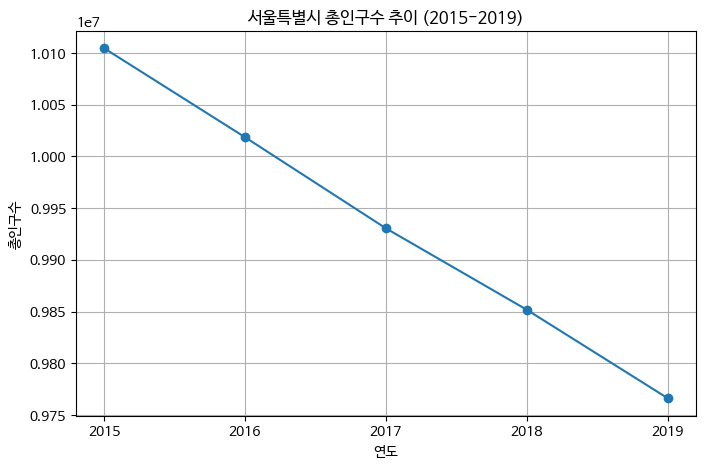

In [9]:
#서울특별시
df1 = df_total_population[df_total_population['행정구역'].str.contains('서울특별시')]

year_columns = [col for col in df1.columns if '총인구수' in col]


population_values = df1[year_columns].iloc[0].str.replace(',', '').astype(int)

years = [col.split('년')[0] for col in year_columns]

plt.figure(figsize=(8, 5))
plt.plot(years, population_values, marker='o')
plt.title('서울특별시 총인구수 추이 (2015-2019)')
plt.xlabel('연도')
plt.ylabel('총인구수')
plt.grid(True)
plt.show()

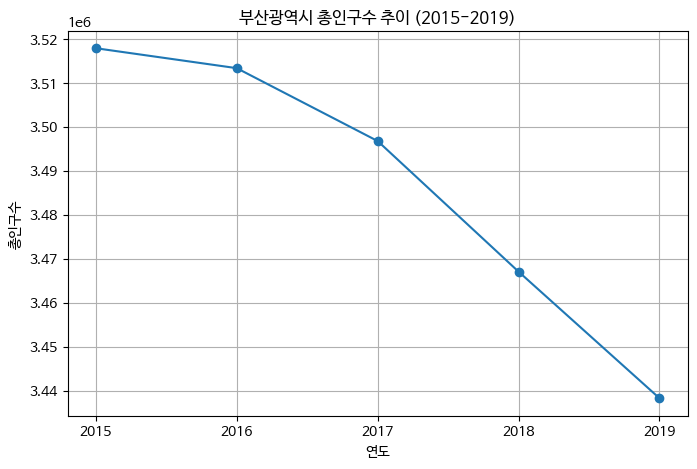

In [10]:
#부산광역시
df1 = df_total_population[df_total_population['행정구역'].str.contains('부산광역시')]

year_columns = [col for col in df1.columns if '총인구수' in col]


population_values = df1[year_columns].iloc[0].str.replace(',', '').astype(int)

years = [col.split('년')[0] for col in year_columns]

plt.figure(figsize=(8, 5))
plt.plot(years, population_values, marker='o')
plt.title('부산광역시 총인구수 추이 (2015-2019)')
plt.xlabel('연도')
plt.ylabel('총인구수')
plt.grid(True)
plt.show()

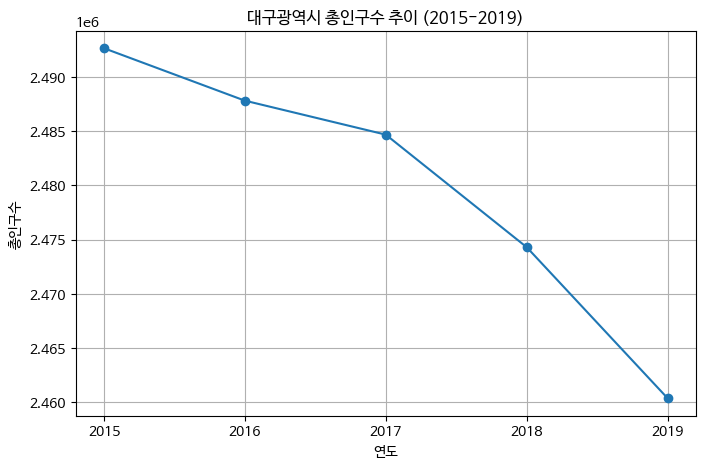

In [11]:
#대구광역시
df1 = df_total_population[df_total_population['행정구역'].str.contains('대구광역시')]

year_columns = [col for col in df1.columns if '총인구수' in col]


population_values = df1[year_columns].iloc[0].str.replace(',', '').astype(int)

years = [col.split('년')[0] for col in year_columns]

plt.figure(figsize=(8, 5))
plt.plot(years, population_values, marker='o')
plt.title('대구광역시 총인구수 추이 (2015-2019)')
plt.xlabel('연도')
plt.ylabel('총인구수')
plt.grid(True)
plt.show()

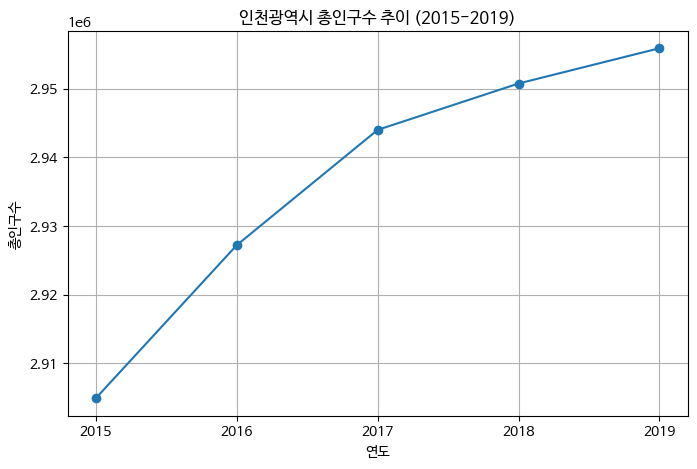

In [12]:
#인천광역시
df1 = df_total_population[df_total_population['행정구역'].str.contains('인천광역시')]

year_columns = [col for col in df1.columns if '총인구수' in col]


population_values = df1[year_columns].iloc[0].str.replace(',', '').astype(int)

years = [col.split('년')[0] for col in year_columns]

plt.figure(figsize=(8, 5))
plt.plot(years, population_values, marker='o')
plt.title('인천광역시 총인구수 추이 (2015-2019)')
plt.xlabel('연도')
plt.ylabel('총인구수')
plt.grid(True)
plt.show()

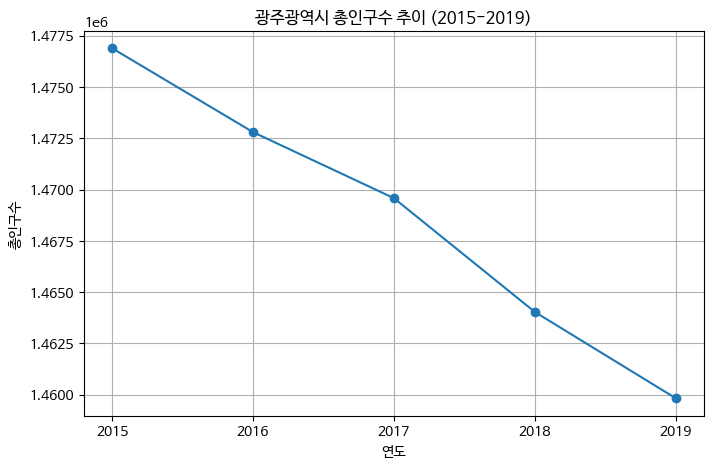

In [13]:
#광주광역시
df1 = df_total_population[df_total_population['행정구역'].str.contains('광주광역시')]

year_columns = [col for col in df1.columns if '총인구수' in col]


population_values = df1[year_columns].iloc[0].str.replace(',', '').astype(int)

years = [col.split('년')[0] for col in year_columns]

plt.figure(figsize=(8, 5))
plt.plot(years, population_values, marker='o')
plt.title('광주광역시 총인구수 추이 (2015-2019)')
plt.xlabel('연도')
plt.ylabel('총인구수')
plt.grid(True)
plt.show()

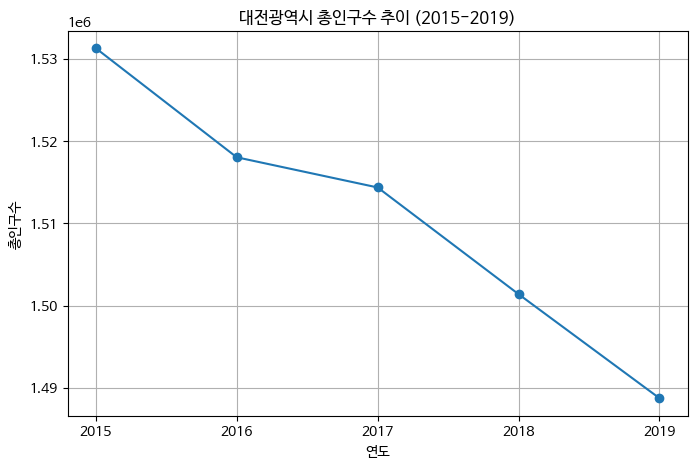

In [14]:
#대전광역시
df1 = df_total_population[df_total_population['행정구역'].str.contains('대전광역시')]

year_columns = [col for col in df1.columns if '총인구수' in col]


population_values = df1[year_columns].iloc[0].str.replace(',', '').astype(int)

years = [col.split('년')[0] for col in year_columns]

plt.figure(figsize=(8, 5))
plt.plot(years, population_values, marker='o')
plt.title('대전광역시 총인구수 추이 (2015-2019)')
plt.xlabel('연도')
plt.ylabel('총인구수')
plt.grid(True)
plt.show()

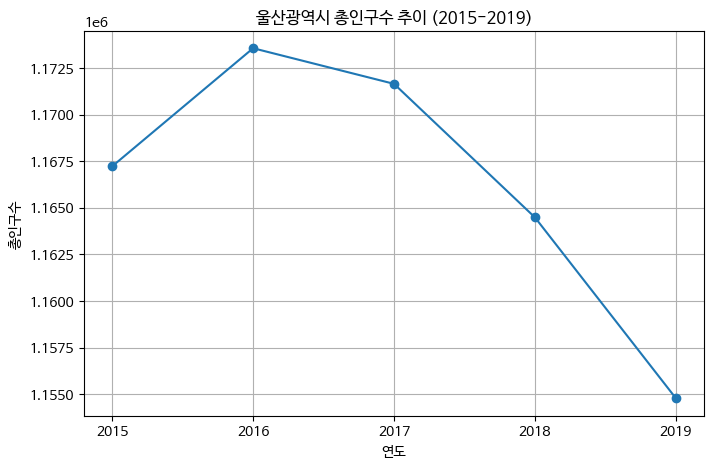

In [15]:
#울산광역시
df1 = df_total_population[df_total_population['행정구역'].str.contains('울산광역시')]

year_columns = [col for col in df1.columns if '총인구수' in col]


population_values = df1[year_columns].iloc[0].str.replace(',', '').astype(int)

years = [col.split('년')[0] for col in year_columns]

plt.figure(figsize=(8, 5))
plt.plot(years, population_values, marker='o')
plt.title('울산광역시 총인구수 추이 (2015-2019)')
plt.xlabel('연도')
plt.ylabel('총인구수')
plt.grid(True)
plt.show()

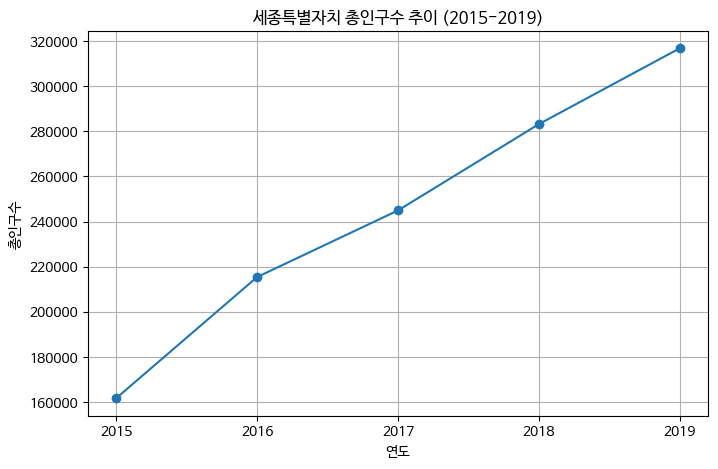

In [16]:
#세종특별자치
df1 = df_total_population[df_total_population['행정구역'].str.contains('세종특별자치')]

year_columns = [col for col in df1.columns if '총인구수' in col]


population_values = df1[year_columns].iloc[0].str.replace(',', '').astype(int)

years = [col.split('년')[0] for col in year_columns]

plt.figure(figsize=(8, 5))
plt.plot(years, population_values, marker='o')
plt.title('세종특별자치 총인구수 추이 (2015-2019)')
plt.xlabel('연도')
plt.ylabel('총인구수')
plt.grid(True)
plt.show()

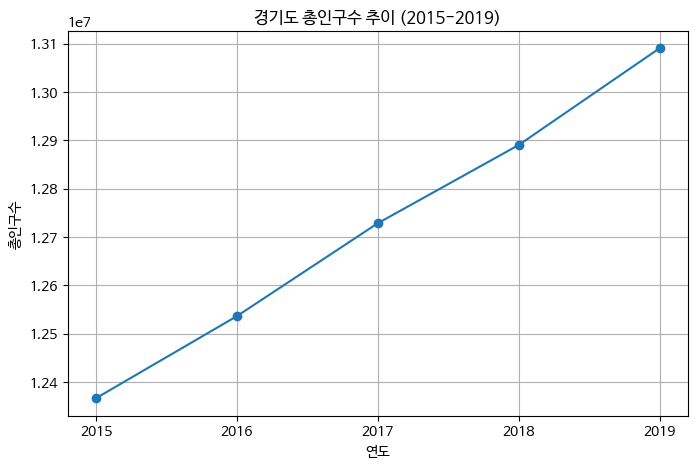

In [17]:
#경기도
df1 = df_total_population[df_total_population['행정구역'].str.contains('경기도')]

year_columns = [col for col in df1.columns if '총인구수' in col]


population_values = df1[year_columns].iloc[0].str.replace(',', '').astype(int)

years = [col.split('년')[0] for col in year_columns]

plt.figure(figsize=(8, 5))
plt.plot(years, population_values, marker='o')
plt.title('경기도 총인구수 추이 (2015-2019)')
plt.xlabel('연도')
plt.ylabel('총인구수')
plt.grid(True)
plt.show()

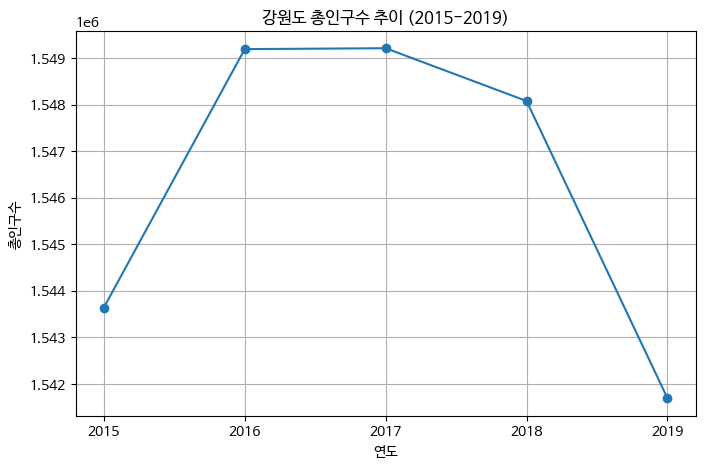

In [18]:
#강원도
df1 = df_total_population[df_total_population['행정구역'].str.contains('강원도')]

year_columns = [col for col in df1.columns if '총인구수' in col]


population_values = df1[year_columns].iloc[0].str.replace(',', '').astype(int)

years = [col.split('년')[0] for col in year_columns]

plt.figure(figsize=(8, 5))
plt.plot(years, population_values, marker='o')
plt.title('강원도 총인구수 추이 (2015-2019)')
plt.xlabel('연도')
plt.ylabel('총인구수')
plt.grid(True)
plt.show()

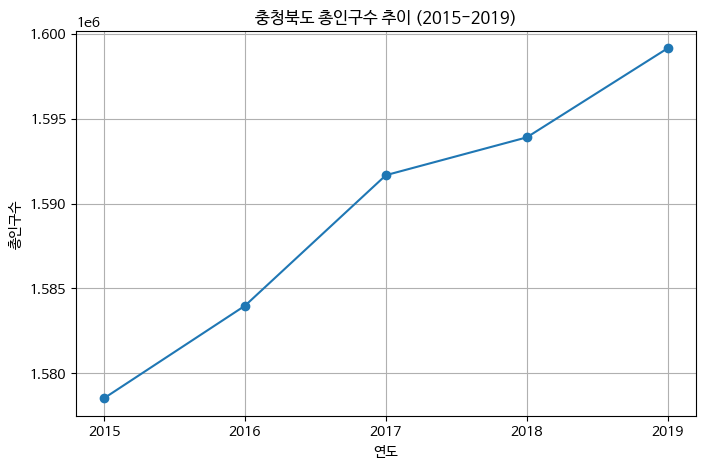

In [19]:
#충청북도
df1 = df_total_population[df_total_population['행정구역'].str.contains('충청북도')]

year_columns = [col for col in df1.columns if '총인구수' in col]


population_values = df1[year_columns].iloc[0].str.replace(',', '').astype(int)

years = [col.split('년')[0] for col in year_columns]

plt.figure(figsize=(8, 5))
plt.plot(years, population_values, marker='o')
plt.title('충청북도 총인구수 추이 (2015-2019)')
plt.xlabel('연도')
plt.ylabel('총인구수')
plt.grid(True)
plt.show()

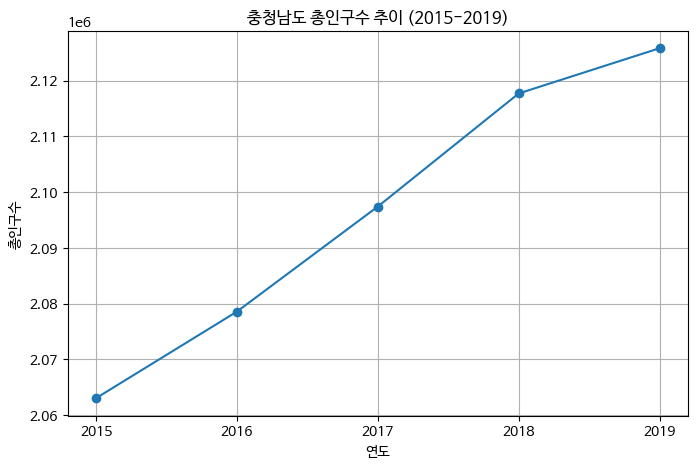

In [20]:
#충청남도
df1 = df_total_population[df_total_population['행정구역'].str.contains('충청남도')]

year_columns = [col for col in df1.columns if '총인구수' in col]


population_values = df1[year_columns].iloc[0].str.replace(',', '').astype(int)

years = [col.split('년')[0] for col in year_columns]

plt.figure(figsize=(8, 5))
plt.plot(years, population_values, marker='o')
plt.title('충청남도 총인구수 추이 (2015-2019)')
plt.xlabel('연도')
plt.ylabel('총인구수')
plt.grid(True)
plt.show()

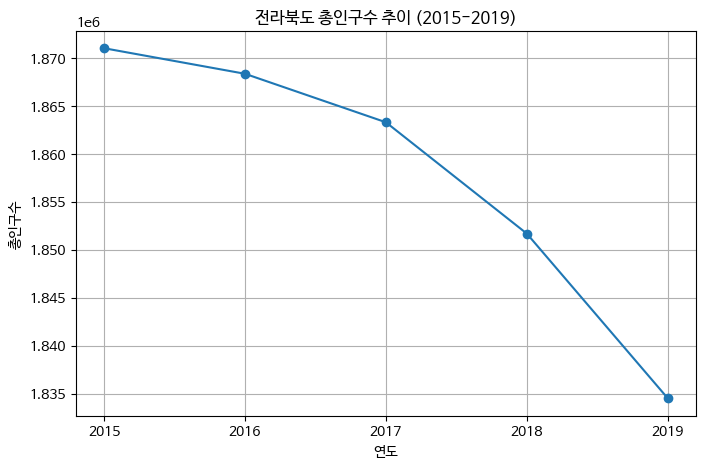

In [21]:
#전라북도
df1 = df_total_population[df_total_population['행정구역'].str.contains('전라북도')]

year_columns = [col for col in df1.columns if '총인구수' in col]


population_values = df1[year_columns].iloc[0].str.replace(',', '').astype(int)

years = [col.split('년')[0] for col in year_columns]

plt.figure(figsize=(8, 5))
plt.plot(years, population_values, marker='o')
plt.title('전라북도 총인구수 추이 (2015-2019)')
plt.xlabel('연도')
plt.ylabel('총인구수')
plt.grid(True)
plt.show()

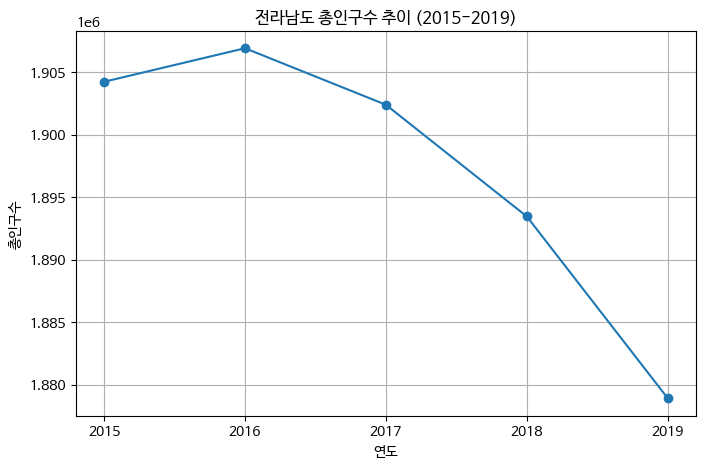

In [22]:
#전라남도
df1 = df_total_population[df_total_population['행정구역'].str.contains('전라남도')]

year_columns = [col for col in df1.columns if '총인구수' in col]


population_values = df1[year_columns].iloc[0].str.replace(',', '').astype(int)

years = [col.split('년')[0] for col in year_columns]

plt.figure(figsize=(8, 5))
plt.plot(years, population_values, marker='o')
plt.title('전라남도 총인구수 추이 (2015-2019)')
plt.xlabel('연도')
plt.ylabel('총인구수')
plt.grid(True)
plt.show()

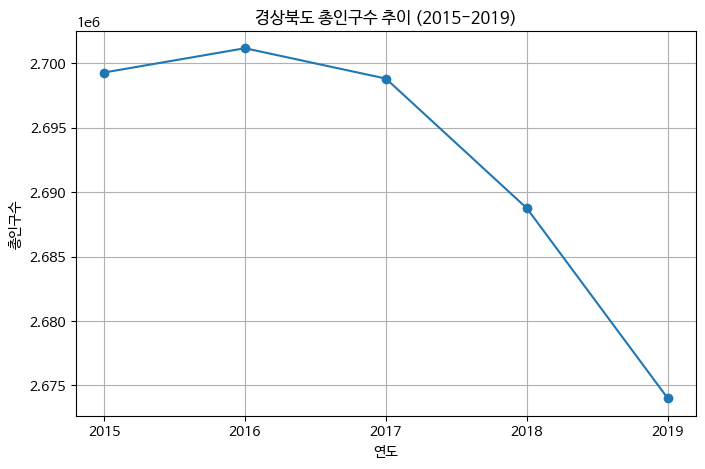

In [23]:
#경상북도
df1 = df_total_population[df_total_population['행정구역'].str.contains('경상북도')]

year_columns = [col for col in df1.columns if '총인구수' in col]


population_values = df1[year_columns].iloc[0].str.replace(',', '').astype(int)

years = [col.split('년')[0] for col in year_columns]

plt.figure(figsize=(8, 5))
plt.plot(years, population_values, marker='o')
plt.title('경상북도 총인구수 추이 (2015-2019)')
plt.xlabel('연도')
plt.ylabel('총인구수')
plt.grid(True)
plt.show()

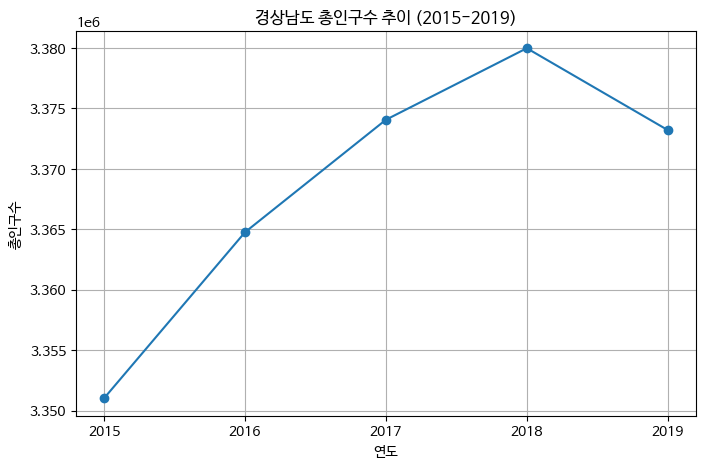

In [24]:
#경상남도
df1 = df_total_population[df_total_population['행정구역'].str.contains('경상남도')]

year_columns = [col for col in df1.columns if '총인구수' in col]


population_values = df1[year_columns].iloc[0].str.replace(',', '').astype(int)

years = [col.split('년')[0] for col in year_columns]

plt.figure(figsize=(8, 5))
plt.plot(years, population_values, marker='o')
plt.title('경상남도 총인구수 추이 (2015-2019)')
plt.xlabel('연도')
plt.ylabel('총인구수')
plt.grid(True)
plt.show()

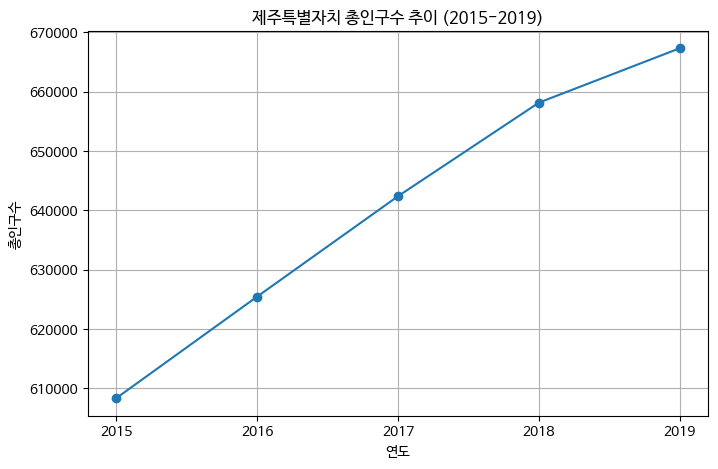

In [25]:
#제주특별자치
df1 = df_total_population[df_total_population['행정구역'].str.contains('제주특별자치')]

year_columns = [col for col in df1.columns if '총인구수' in col]


population_values = df1[year_columns].iloc[0].str.replace(',', '').astype(int)

years = [col.split('년')[0] for col in year_columns]

plt.figure(figsize=(8, 5))
plt.plot(years, population_values, marker='o')
plt.title('제주특별자치 총인구수 추이 (2015-2019)')
plt.xlabel('연도')
plt.ylabel('총인구수')
plt.grid(True)
plt.show()